## Credit Card Fraud Detection Challenge

First and foremost, I have imported all the necessary `libraries` required to run this Jupyter Notebook. I have refrained from importing any such library which I have not made use of in my code. 

**Note: The only thing which needs to be ensured to run this code is to have the dataset (transactions.txt) file in the same folder location as this Jupyter NB**

### Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
import collections

Next, making use of the `Pandas` library which was imported in the previous code block, I have loaded the given dataset. Since the dataset was in the JSON format, I have made use of the read_json function of the Pandas library. Next, I have replaced any/all blank values in the dataset with NAs.

In [2]:
data = pd.read_json('transactions.txt', lines=True)
data.replace('', np.nan, inplace=True)

Having a brief look at the dataset...

In [3]:
data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


Checking and counting the number of `null` values in each column of the given dataset.

In [4]:
print(data.isnull().sum())

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

Checking the shape of the given dataset i.e. the number of rows and columns in the data.

In [5]:
data.shape

(786363, 29)

Making use of the inbuilt `describe()` function so as to have a look at the data from a more statistical point of view. With the help of this function, we can have a detailed look into the numerical columns of the given dataset. It returns values like `mean`, `min`, `max`, `quantiles` etc.

In [6]:
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


In [7]:
data.describe

<bound method NDFrame.describe of         accountNumber  customerId  creditLimit  availableMoney  \
0           737265056   737265056         5000         5000.00   
1           737265056   737265056         5000         5000.00   
2           737265056   737265056         5000         5000.00   
3           737265056   737265056         5000         5000.00   
4           830329091   830329091         5000         5000.00   
...               ...         ...          ...             ...   
786358      732852505   732852505        50000        48904.96   
786359      732852505   732852505        50000        48785.04   
786360      732852505   732852505        50000        48766.15   
786361      732852505   732852505        50000        48716.72   
786362      732852505   732852505        50000        48666.83   

        transactionDateTime  transactionAmount         merchantName  \
0       2016-08-13T14:27:32              98.55                 Uber   
1       2016-10-11T05:05:54    

In [8]:
data_1=data  #making a copy of the dataset for further work

Dropping colummns from the dataset which have only `NA or zero values`, and hence are not useful to us for any analysis.

In [9]:
data_1.drop(['echoBuffer','merchantCity', 'merchantZip','merchantState', 'posOnPremises', 'recurringAuthInd'],
            axis=1, inplace=True)
data_1= data_1.reset_index(drop=True)

In [10]:
data_1.isnull().sum() #checking for new count of NAs after dropping columns

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64

In [11]:
data_1

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


The given dataset is a mixture of categorical and numerical data. Below are the details of the unique values of some of the `categorical data`.

In [12]:
data_1["merchantName"].value_counts()

Uber                             25613
Lyft                             25523
oldnavy.com                      16992
staples.com                      16980
alibaba.com                      16959
                                 ...  
Sprint Communications #561941        2
Runners #383214                      2
Curves #849125                       1
EZ Wireless #149871                  1
TMobile Wireless #602341             1
Name: merchantName, Length: 2490, dtype: int64

In [13]:
data_1['acqCountry'].value_counts()

US     774709
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64

In [14]:
data_1['transactionType'].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64

### Question 2

Now that the data has been loaded, read and understood (statistically), I will be looking into some more data understanding with the help of `visualizations`.

I have considered the `Transaction Amount` attribute for visualizations....

Text(0.5, 1.0, 'Histogram of Transaction Amount')

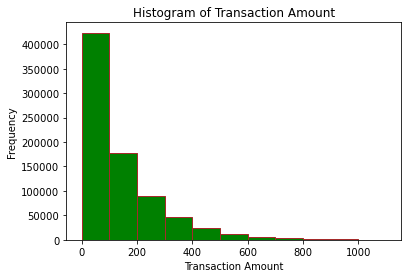

In [15]:
mpl.hist(data_1['transactionAmount'], bins=[0,100,200,300,400,500,600,700,800,900,1000,1100],
         edgecolor="brown", color="green")
mpl.xlabel("Transaction Amount")
mpl.ylabel("Frequency")
mpl.title("Histogram of Transaction Amount")

First up is the `histogram`. As can be seen from the figure above, that major of the transaction amount vary between 0 - 300 dollars, with the graph only decreasing in frequency as the transaction amount increases.

Text(0.5, 1.0, 'Boxplot of Transaction Amount')

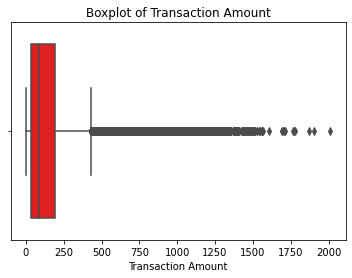

In [16]:
sb.boxplot(data=data_1, x="transactionAmount", color="red")
mpl.xlabel("Transaction Amount")
mpl.title("Boxplot of Transaction Amount")

Next, is the `boxplot`. It can be clearly seen that the boxplot is sckewed to the left, which again points to the fact that the transaction amounts are usually not large in nature, which kinda makes sense as well.

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distance Plot of Transaction Amount')

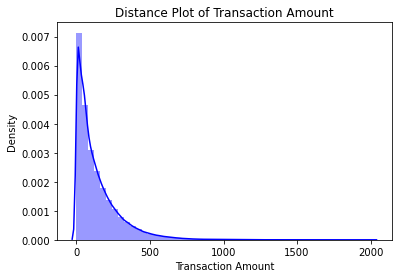

In [17]:
sb.distplot(data_1["transactionAmount"], color="blue")
mpl.xlabel("Transaction Amount")
mpl.title("Distance Plot of Transaction Amount")

Next up, the `distance plot`. And yet again, it does not deviate from the fact that the transaction amounts which are made, are low in nature. Of course, who would be spending $1000 on a frequent basis!

Text(0, 0.5, 'Transaction Amount')

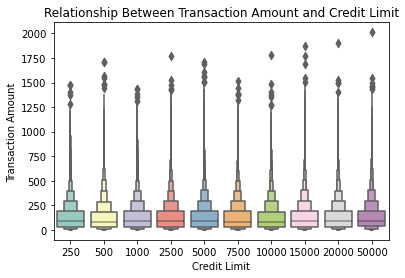

In [18]:
sb.boxenplot(data=data_1, x='creditLimit', y='transactionAmount', palette='Set3')
mpl.title('Relationship Between Transaction Amount and Credit Limit')
mpl.xlabel('Credit Limit')
mpl.ylabel('Transaction Amount')

Lastly, I wanted to explore a little more wrt to the `Transaction Amount` attribute. Hence in this last visualization I have tried to show the relationship between `Credit Limit` and `Transaction Amount`. 

My assumption was that having a higher credit limit would lead to more expensive and more number of overall transactions, but this absolutely does not seem to be the situation.

It can be seen that the people with relatively higher credit limits are those who are wise with spending their money and do not spend it recklessly.

### Question 3

This section of the code highlights the `Data Wrangling` part of this challenge. So, here-in I was supposed to find the duplicate transactions in the given dataset and extimate the average of such duplicate transactions.

The duplicate transactions fall into the below two categories:

* Multi Swipe

Here, the same transaction amount for a commodity was transacted twice within a short interval of time

* Reversal

Here a purchase is followed up by a Reverse Transaction.

Firstly, finding out the `Multi- swipe` transactions. Here, again I have made a duplicate of the dataset for further manipulations. Next, I have converted the `transactionDateTime` column to the proper data type

In [42]:
data_2=data_1   
data_2['transactionDateTime'] = pd.to_datetime(data_2['transactionDateTime'])

In [20]:
data_2.dtypes

accountNumber                        int64
customerId                           int64
creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate                      object
accountOpenDate                     object
dateOfLastAddressChange             object
cardCVV                              int64
enteredCVV                           int64
cardLast4Digits                      int64
transactionType                     object
currentBalance                     float64
cardPresent                           bool
expirationDateKeyInMatch              bool
isFraud                               bool
dtype: obje

Now, the main logic - firstly, we need to sort the `transactionDateTime` column so as to gain insights of the multi swipe transactions.
Then, I have created a new column on the database `Duplicated?`. This column is filled up on the basis that if there are two transactions which are made within **2 mins** of each other and are having the same transaction Amount, then the column is populated with a "yes", otherwise a "no"

In [21]:
data_2.sort_values(['customerId', 'transactionDateTime'], inplace=True)

m1 = data_2.groupby('customerId', sort=False)['transactionAmount'].apply(lambda x: x.duplicated())
m2 = data_2.groupby('customerId', sort=False)['transactionDateTime'].diff() <= pd.Timedelta(2, unit='minutes')

data_2['Duplicated?'] = np.where(m1 & m2, 'Yes', 'No')

In [50]:
print(data['transactionDateTime'].value_counts())

2016-12-25T14:04:15    4
2016-05-28T14:24:41    4
2016-06-02T11:27:00    3
2016-04-24T22:44:16    3
2016-04-14T13:11:10    3
                      ..
2016-09-11T13:32:42    1
2016-09-11T13:35:34    1
2016-09-11T13:38:27    1
2016-09-11T13:57:50    1
2016-12-30T20:10:29    1
Name: transactionDateTime, Length: 776637, dtype: int64


In [47]:
print(min(data_2['transactionDateTime']))

2016-01-01 00:01:02


Counting the number of unique values for the `Duplicated?` column.

In [22]:
data_2['Duplicated?'].value_counts()

No     775381
Yes     10982
Name: Duplicated?, dtype: int64

Here, I have fetched all the data from `data_2` dataframe, having the value of the `Duplicated?` column as "Yes" and put it in a seperate dataframe

In [23]:
sub_data=data_2.loc[data_1["Duplicated?"]=="Yes"]

Finally, finding the sum of the transaction which are Duplicate. The answer is $1,472,873.8

In [24]:
ms=sub_data["transactionAmount"].sum()

Now, for the second type of duplicate transactions, the dataset has a column labelled `transactionType`, where the "Reversal" transactions are clearly marked. Just need to pull those from the dataset and find their sum

In [25]:
data_2["transactionType"].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64

In [26]:
data_2['transactionType']=data_2['transactionType'].astype('string')  # Converting the column to string data type

In [27]:
sub_data1=data_2.loc[data_1["transactionType"]=="REVERSAL"]

In [28]:
sub_data1["transactionType"].value_counts() # Finding the count of Reversal transactions

REVERSAL    20303
Name: transactionType, dtype: Int64

In [29]:
re=sub_data1['transactionAmount'].sum() # Finding the sum of the reversed transactions

The answer is $2,821,792.5

In [30]:
dup=ms+re #totalling the amount for duplicate transactions
tot=data['transactionAmount'].sum() #total sum of all transactions

In [31]:
(dup/tot)*100

3.9868585889967605

So, we can see that about `3.98%` of the total transactions fall into the category of being **duplicate** which seems low in terms of percentage, but looking at the amount which that duplicate transactions represent, it is quite a lot !

### Question 4

This is the last section of the code. Here, I have built a predictive model using Machine Learning concepts which help determines whether a particular transaction is fraudulent in nature or not

Firstly, I start off by creating a correlation, Matrix. Correlation matrix visually gives us an idea of how, features in a said dataset, correlate with one other and can be useful is helping us predict what are the features that are most relevant for the said prediction.

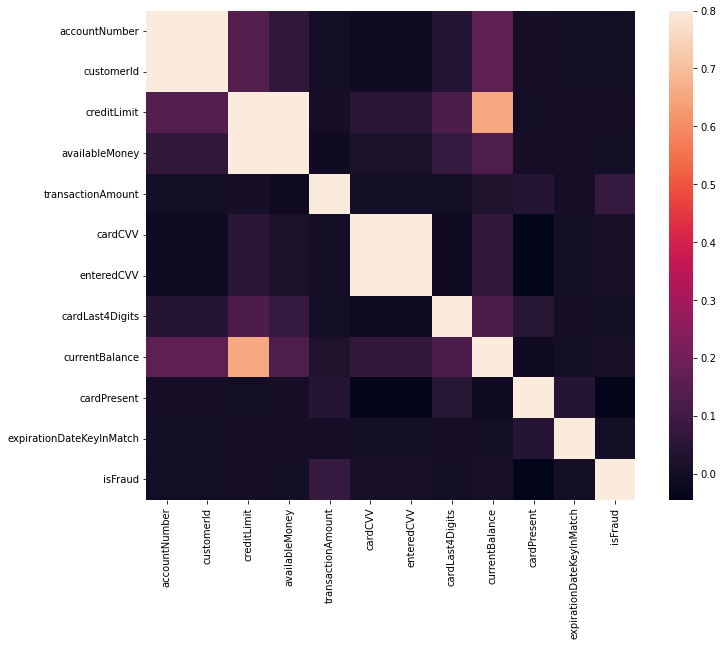

In [32]:
cmat = data_2.corr()
fig = mpl.figure(figsize = (12, 9))
sb.heatmap(cmat, vmax = .8, square = True)
mpl.show()

In [33]:
data_2    #looking at the dataset again

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Duplicated?
541900,100088067,100088067,50000,50000.00,2016-01-12 00:59:52,205.13,EZ Putt Putt #982199,US,US,02,...,2014-01-09,546,546,4615,PURCHASE,0.00,True,False,False,No
541901,100088067,100088067,50000,49794.87,2016-01-12 19:49:41,46.43,Dinosaur Sandwitch Bar #303701,US,US,05,...,2014-01-09,546,546,4615,PURCHASE,205.13,True,False,False,No
541902,100088067,100088067,50000,49748.44,2016-01-17 15:41:46,378.67,Mobile eCards,US,US,05,...,2014-01-09,402,402,2077,PURCHASE,251.56,False,False,False,No
541903,100088067,100088067,50000,50000.00,2016-02-02 19:57:18,66.07,EZ Putt Putt #40513,US,US,02,...,2014-01-09,546,546,4615,PURCHASE,0.00,True,False,False,No
541904,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,...,2014-01-09,546,546,4615,PURCHASE,66.07,True,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,999389635,999389635,5000,4921.32,2016-09-16 15:35:24,267.62,Franks Pub #680641,US,US,09,...,2015-10-09,140,140,3991,PURCHASE,78.68,True,False,False,No
108112,999389635,999389635,5000,4653.70,2016-09-22 13:58:30,4.62,Play Store,US,US,05,...,2015-10-09,140,140,3991,PURCHASE,346.30,False,False,False,No
108113,999389635,999389635,5000,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,...,2015-10-09,140,140,3991,PURCHASE,325.92,False,False,False,No
108114,999389635,999389635,5000,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,...,2015-10-09,140,140,3991,PURCHASE,305.54,False,False,False,No


Again, dropping attributes from the dataset which are not required to build the model

In [34]:
dropp=["merchantName", "acqCountry", "merchantCountryCode", "posEntryMode", "dateOfLastAddressChange", "expirationDateKeyInMatch",
      "transactionDateTime", "posConditionCode", "merchantCategoryCode", "currentExpDate", "accountOpenDate", "cardCVV", "enteredCVV", "cardLast4Digits", 
      "transactionType", "cardPresent","Duplicated?"]
data_2=data_2.drop(labels=dropp, axis=1)

Dividing X and Y from the dataset in order to make predictions

In [35]:
x=data_2.drop(["isFraud"], axis=1)
y=data_2["isFraud"]
x_data=x.values
y_data=y.values

Splitting the dataset into test and training sections. I have made a split of 15% test data and 85% training data

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15)

Defining the models to be used on the dataset

In [37]:
classifiers = {"LogisiticRegression": LogisticRegression(),"KNearest": KNeighborsClassifier()}

Finally, passing our reduced and cleaned dataset into the models and predicting the accuraccy.

In [38]:
for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression has a training score of 98.0 % accuracy score
Classifiers:  KNeighborsClassifier has a training score of 98.0 % accuracy score


As you can see that both the models which are used pretty much return the same accuracy of `98%`. More in-depth details on the models - why these ones where chosen, what challenges I faced etc. Can be found at the very beginning of this NB!